# <font color='blue'> Regressão Logística</font>

## Criando um dataset dummy

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

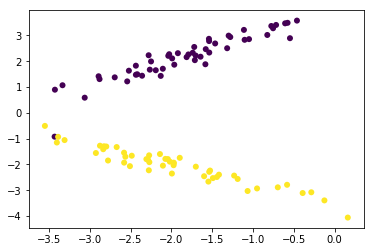

In [2]:
# Definindo x e y
X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 2,
                           n_redundant = 0, n_clusters_per_class = 1, 
                           class_sep = 2.0, random_state = 101)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, linewidth = 0, edgecolor = None)
plt.show()

In [3]:
y_orig = [0,0,0,0,0,0,1,1,1,1]
y_pred = [0,0,0,0,1,1,1,1,1,0]

## Medindo a Performance do Classificador

In [4]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_orig, y_pred)

array([[4, 2],
       [1, 3]])

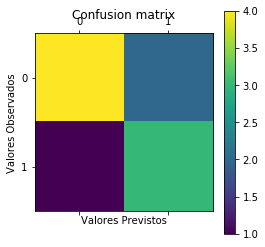

In [5]:
# Construindo a Confusion Matrix
plt.matshow(confusion_matrix(y_orig, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Valores Observados')
plt.xlabel('Valores Previstos')
plt.show()

In [6]:
# Score de Acurácia
from sklearn.metrics import accuracy_score
accuracy_score(y_orig, y_pred)

0.7

In [7]:
# Score de Precisão
from sklearn.metrics import precision_score
precision_score(y_orig, y_pred)

0.6

In [8]:
# Score de Recall
from sklearn.metrics import recall_score
recall_score(y_orig, y_pred)

0.75

In [9]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_orig, y_pred)

0.6666666666666665

In [10]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_orig, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.67      0.73         6
          1       0.60      0.75      0.67         4

avg / total       0.72      0.70      0.70        10



## Usando o Classificador

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), test_size = 0.33, random_state = 101)

In [13]:
y_test.dtype

dtype('float64')

In [14]:
y_test

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.])

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Criando o modelo e fazendo as previsões
modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo.predict(X_test)

array([-0.19021825,  1.14481132,  1.16345687,  0.00906543,  0.17492642,
        0.75010591,  0.01764075,  0.69408067,  0.99490823,  0.98471815,
        0.01184894,  0.91408215,  0.77985749,  0.66302112,  0.04339816,
        0.19057929,  1.19126856,  0.01473595,  0.80911677, -0.03827048,
       -0.08450995, -0.22769924,  0.57176711,  0.75836004,  1.02104676,
        1.06148483,  0.873505  ,  1.04779876, -0.1655144 ,  0.66570701,
       -0.01700988,  1.03270133,  0.00856569])

## A função sigmoid (logit)

In [17]:
import numpy as np

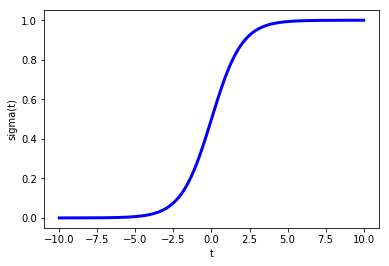

In [18]:
def model(x):
    return 1 / (1 + np.exp(-x))

X_vals = np.linspace(-10, 10, 1000)
plt.plot(X_vals, model(X_vals), color = 'blue', linewidth = 3)
plt.ylabel('sigma(t)')
plt.xlabel('t')

plt.show()

## Classificação e Fronteiras de Decisão

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
# Modelo de regressão logística
clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

print(classification_report(y_test, y_clf))

             precision    recall  f1-score   support

        0.0       1.00      0.93      0.97        15
        1.0       0.95      1.00      0.97        18

avg / total       0.97      0.97      0.97        33



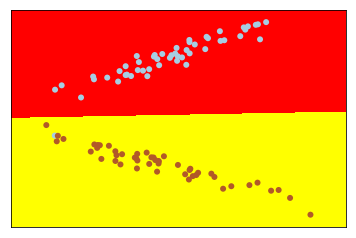

In [21]:
# Plot da fornteira de decisão

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors = 'k', linewidth = 0, cmap = plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

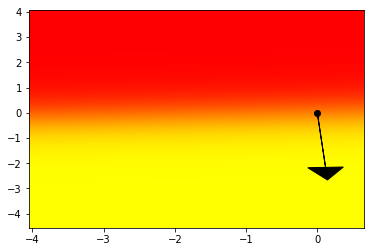

In [22]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

### ALTERANDO AXES(). NAO É MAIS UTILIZADO
#ax = plt.axes()
plt.arrow(0, 0, clf.coef_[0][0], clf.coef_[0][1], head_width = 0.5, head_length = 0.5, fc = 'k', ec = 'k')
plt.scatter(0, 0, marker='o', c='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [23]:
clf.coef_

array([[ 0.11591199, -2.16308329]])

In [24]:
%timeit clf.fit(X, y)

243 µs ± 1.77 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
%timeit clf.predict(X)

23.2 µs ± 178 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [26]:
%timeit clf.predict_proba(X)

37.9 µs ± 190 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [27]:
# Clean all previous variables
%reset -f

## Regressão Logística Multiclass

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

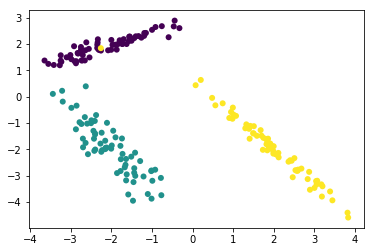

In [29]:
# Gerando os dados
X, y = make_classification(n_samples=200, n_features=2, 
                           n_classes=3, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, 
                           class_sep = 2.0, random_state=101)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0, edgecolor=None)
plt.show()

In [30]:
# Dados de Treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), test_size = 0.33, random_state = 101)

In [31]:
# Gerando o modelo
clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_clf))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        24
        1.0       1.00      1.00      1.00        22
        2.0       1.00      1.00      1.00        20

avg / total       1.00      1.00      1.00        66



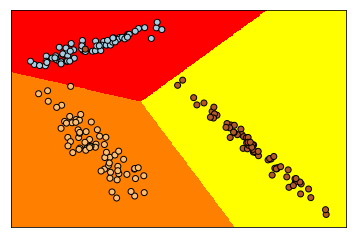

In [33]:
import numpy as np

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [34]:
print(X_test[0])
print(y_test[0])
print(y_clf[0])

[-3.26744968  1.19639333]
0.0
0


In [35]:
clf.predict_proba(X_test[0].reshape(1, -1))

array([[6.78845297e-01, 3.20483077e-01, 6.71626375e-04]])

In [36]:
clf.decision_function(X_test[0].reshape(1, -1))

array([[ 1.74860367, -0.39662288, -7.07803427]])

## Usando o StatsModels

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [38]:
X, y = make_classification(n_samples = 10000, n_features = 10, n_informative = 10, n_redundant = 0, random_state = 101)

In [39]:
Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y,Xc)
fitted_model = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


In [40]:
### ALTERANDO summary. O summary NÃO ESTÁ FUNCIONANDO MAIS
fitted_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.367    
Dependent Variable: y                AIC:              8795.6903
Date:               2018-07-24 20:30 BIC:              8875.0040
No. Observations:   10000            Log-Likelihood:   -4386.8  
Df Model:           10               LL-Null:          -6931.5  
Df Residuals:       9989             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
const    0.4299     0.0390    11.0229   0.0000    0.3535    0.5064
x1       0.0671     0.0152     4.4096   0.0000    0.0373    0.0969
x2      -0.7828     0.0187   -41.9472   0.0000   -0.8194   -0.7462
x3       0.1221     0.0156     7.8145   0.0000    0.0915    0.1527
x4       0.2841     0.0157    18.1501   0.0000    0.2534    0.3148
x5       0.1469     0.0143    10.2832   0.0000    0.1189    0.1749
x6      -0.3414     0.0194   -17.6365   0.0000   -0.3794   -0.3035
x7       0.0503     0.0145     3.4815   0.0005    0.0220    0.0786
x8      -0.1393     0.0144    -9.6419   0.0000   -0.1676   -0.1110
x9       0.1127     0.0142     7.9311   0.0000    0.0848    0.1405
x10     -0.4792     0.0175   -27.3397   0.0000   -0.5135   -0.4448
================================================================

"""

In [41]:
Xd = pd.DataFrame(X)
Xd.columns = ['VAR'+str(i+1) for i in range(10)]
Xd['response'] = y

logistic_regression = smf.logit(
    formula = 'response ~ VAR1+ VAR2 + VAR3 + VAR4 + \
               VAR5 + VAR6 + VAR7 + VAR8 + VAR9 + VAR10',
               data=Xd)

fitted_model = logistic_regression.fit()
fitted_model.summary2()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.367    
Dependent Variable: response         AIC:              8795.6903
Date:               2018-07-24 20:30 BIC:              8875.0040
No. Observations:   10000            Log-Likelihood:   -4386.8  
Df Model:           10               LL-Null:          -6931.5  
Df Residuals:       9989             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Intercept    0.4299    0.0390   11.0229  0.0000   0.3535   0.5064
VAR1         0.0671    0.0152    4.4096  0.0000   0.0373   0.0969
VAR2        -0.7828    0.0187  -41.9472  0.0000  -0.8194  -0.7462
VAR3         0.1221    0.0156    7.8145  0.0000   0.0915   0.1527
VAR4         0.2841    0.0157   18.1501  0.0000   0.2534   0.3148
VAR5         0.1469    0.0143   10.2832  0.0000   0.1189   0.1749
VAR6        -0.3414    0.0194  -17.6365  0.0000  -0.3794  -0.3035
VAR7         0.0503    0.0145    3.4815  0.0005   0.0220   0.0786
VAR8        -0.1393    0.0144   -9.6419  0.0000  -0.1676  -0.1110
VAR9         0.1127    0.0142    7.9311  0.0000   0.0848   0.1405
VAR10       -0.4792    0.0175  -27.3397  0.0000  -0.5135  -0.4448
================================================================

"""

## Gradiente Descendente

In [42]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [43]:
observations = len(X)
variables = ['VAR'+str(i+1) for i in range(10)]

In [44]:
import random

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def sigmoid(X,w):
    return 1./(1.+np.exp(-np.dot(X,w)))

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def logit_loss(X,w,y):
    return sigmoid(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y,loss_type=squared_loss):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss_type(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01, loss_type=squared_loss):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y,loss_type))]

def optimize(X,y, alpha=0.01, eta = 10**-12, loss_type=squared_loss, iterations = 1000):
    standardization = StandardScaler()
    Xst = standardization.fit_transform(X)
    original_means, originanal_stds = standardization.mean_, standardization.scale_
    Xst = np.column_stack((Xst,np.ones(observations)))
    w = random_w(Xst.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(Xst,w,y))
        new_w = update(Xst,w,y, alpha=alpha, loss_type=logit_loss)
        new_SSL = np.sum(squared_loss(Xst,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            break
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    unstandardized_betas = w[:-1] / originanal_stds
    unstandardized_bias  = w[-1]-np.sum((original_means / originanal_stds) * w[:-1])
    return np.insert(unstandardized_betas, 0, unstandardized_bias), path, k
                                

In [45]:
alpha = 0.5
w, path, iterations = optimize(X, y, alpha, eta = 10**-5, loss_type=logit_loss, iterations = 100000)
print ("Coeficientes finais padronizados: %s" % w)
print ("Número de iterações até atingir o ponto ideal de otimização %i " % (iterations + 1))

Coeficientes finais padronizados: [ 0.42991407  0.0670771  -0.78279578  0.12208733  0.28410285  0.14689341
 -0.34143436  0.05031078 -0.1393206   0.11267402 -0.47916908]
Número de iterações até atingir o ponto ideal de otimização 897 


## Implementação com Scikit-Learn

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# Construindo o modelo
# C = Inverso da força de regularização. Deve ser um número floar positivo
# tol = Tolerância do critério de parada.
clf = LogisticRegression(C = 1E4, tol = 1E-25, random_state = 101)
clf.fit(X,y)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=101,
          solver='liblinear', tol=1e-25, verbose=0, warm_start=False)

In [48]:
coeffs = [clf.intercept_[0]]
coeffs.extend(clf.coef_[0])
coeffs

[0.42991394845314157,
 0.06707709687470954,
 -0.7827957661488678,
 0.12208730826867432,
 0.2841028369319033,
 0.14689340914475532,
 -0.3414343424518862,
 0.05031075649256034,
 -0.13932059152314755,
 0.1126740217378131,
 -0.47916904027905616]

In [49]:
from sklearn.linear_model import SGDClassifier
# alpha = Constante que multiplica os termos de regularização.
# n_iter = número de passadas nos dados de treinamento'.
clf = SGDClassifier(loss = 'log', alpha = 1E-4, max_iter=1E2, random_state = 101)
clf.fit(X,y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=100.0, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=101, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [50]:
coeffs = [clf.intercept_[0]]
coeffs.extend(clf.coef_[0])
coeffs

[0.42571117875899567,
 0.09275466398617539,
 -0.7838137886954415,
 0.09370874582250945,
 0.1675646650527122,
 0.1059652720945873,
 -0.4109157815801866,
 0.06221983248994038,
 -0.19435965629236057,
 0.23531208244782134,
 -0.4879377845504208]